# Лабораторная работа №3
## Вариант 7

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt      
import re

%matplotlib inline
plt.style.use('fast')

## Задача 1

Требуется удалить все колонки с числовыми типами, оставив все строки

In [2]:
df_new = pd.read_csv("Data/seeds.csv")
print("Решение    : Имя колонки : Тип данных")
print("-----------:-------------:------------------------")
for col in df_new.columns:
    decision = "Оставлено "
    col_type = type(df_new[col][0])

    if(col_type in [np.float64, np.int64, int, float]):    
        decision = "Удалено   "
        del df_new[col]

    print(f"{decision} : {col.ljust(11)} : {col_type}")

Решение    : Имя колонки : Тип данных
-----------:-------------:------------------------
Удалено    : area        : <class 'numpy.float64'>
Удалено    : perim       : <class 'numpy.float64'>
Удалено    : compact     : <class 'numpy.float64'>
Удалено    : len         : <class 'numpy.float64'>
Удалено    : width       : <class 'numpy.float64'>
Удалено    : asym        : <class 'numpy.float64'>
Удалено    : grooveLen   : <class 'numpy.float64'>
Оставлено  : class       : <class 'str'>
Удалено    : region_id   : <class 'numpy.int64'>


In [3]:
df_new.head() # Первые 5 строк

,class
0,Kama
1,Kama
2,Kama
3,Kama
4,Kama


In [4]:
df_new.tail() # Последние 5 строк

,class
205,Canadian
206,Canadian
207,Canadian
208,Canadian
209,Canadian


In [5]:
df_new.to_csv('Data/result.csv', index=False)

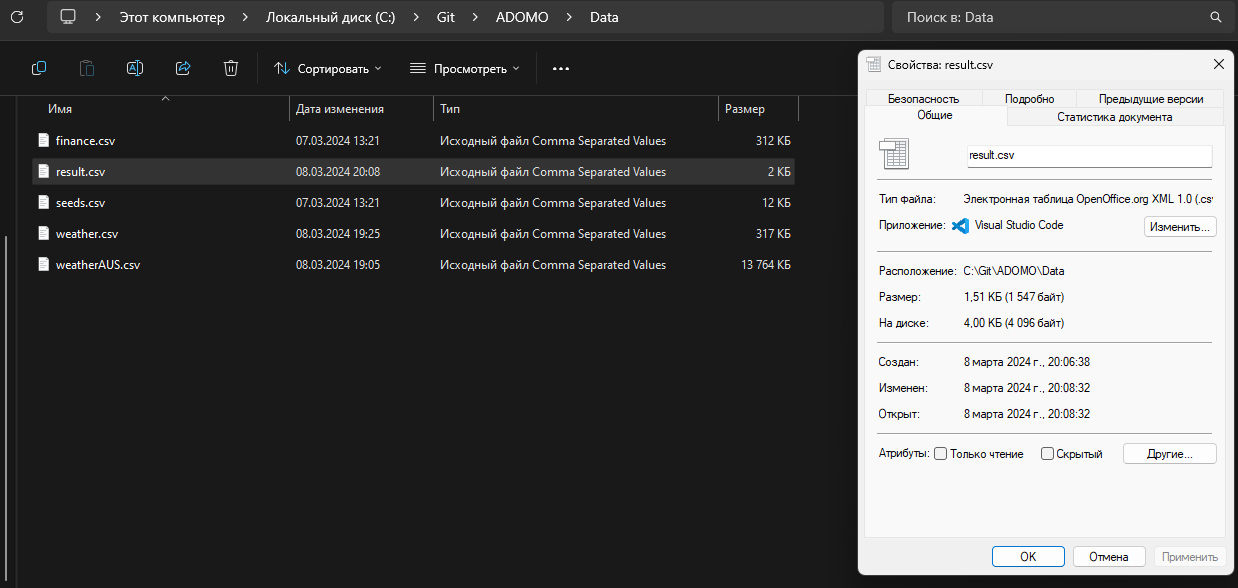

## Задача 2

In [6]:
df = pd.read_csv("Data/titanic.csv")
df.iloc[(df.index >= 19) & (df.index < 25)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
19,1,3,Mrs. Fatima Masselmani,female,22.0,0,0,7.2250
20,0,2,Mr. Joseph J Fynney,male,35.0,0,0,26.0000
21,1,2,Mr. Lawrence Beesley,male,34.0,0,0,13.0000
22,1,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
23,1,1,Mr. William Thompson Sloper,male,28.0,0,0,35.5000
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750


Требуется удалить пассажиров второго класса в возрасте от 15 до 40 лет.

In [7]:
df = df.drop(df.loc[(df["Pclass"] == 2) & (df["Age"] >= 15) & (df["Age"] < 40)].index)
df.iloc[(df.index >= 19) & (df.index < 25)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
19,1,3,Mrs. Fatima Masselmani,female,22.0,0,0,7.2250
22,1,3,Miss. Anna McGowan,female,15.0,0,0,8.0292
23,1,1,Mr. William Thompson Sloper,male,28.0,0,0,35.5000
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750


## Задача 3

In [8]:
df.head()[:4]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


In [9]:
df.tail()[1:5]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


Требуется переименовать колонку "Name" на синоним. Задание можно интерпретировать по-разному: можно переименовать имя колонки, или же можно переименовать занчения в колонке. Поэтому буду переименовывать как колонку, так и значения в ней.

Переименовыввем ФИО из формата "Mr FirstName MiddleName (Bla Bla Bla) LastName" в формат "LastName FirstName".
Пример "Мистер Анатолий Сергеевич (Джонни Сильверхенд) Иванов" станет "Иванов Анатолий". Преобразование выполняется с помощью лямбда-функции, состоящей из преобразования регулярного выражения строки в список с последующей конкатинацией среза списка. Если LastName не указано, то в результате останется только FirstName.

Переименовываем колонку "Name" в "Short name".

In [10]:
df['Name'] = df['Name'].apply(lambda name:' '.join(list(reversed(re.sub(r'\([^)]*?\)', '', name).split()[1::2]))))
df = df.rename(columns={"Name": "Short name"})

df.head()[:4]

,Survived,Pclass,Short name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Braund Owen,male,22.0,1,0,7.2500
1,1,1,Cumings John,female,38.0,1,0,71.2833
2,1,3,Laina,female,26.0,0,0,7.9250
3,1,1,Futrelle Jacques,female,35.0,1,0,53.1000


In [11]:
df.tail()[1:5]

,Survived,Pclass,Short name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
883,1,1,Graham Margaret,female,19.0,0,0,30.00
884,0,3,Johnston Catherine,female,7.0,1,2,23.45
885,1,1,Behr Karl,male,26.0,0,0,30.00
886,0,3,Patrick,male,32.0,0,0,7.75


## Задача 4

Требуется вычислить долю женщин на борту (среди тех, кто отфильрован в задании 2)

In [12]:
print("Ответ:", round(df[df["Sex"] == "female"].Sex.count() / df.Sex.count(), 2))

Ответ: 0.35


## Задача 5

Требуется создать несколько DataFrame с возможными дубликатами строк и объединить их по 
вертикали, удалив дубликаты, с помощью функции concat().

In [13]:
pets = pd.DataFrame({'Species': ['cat', 'norwegian blue parrot', 'dog', 'mouse'],
                     'Age': [2, 5, 3, 0.5],
                     'Name': ['Busia', 'Timofey', 'Donny', 'Nonsense']})
pets

,Species,Age,Name
0,cat,2.0,Busia
1,norwegian blue parrot,5.0,Timofey
2,dog,3.0,Donny
3,mouse,0.5,Nonsense


In [14]:
beasts = pd.DataFrame({'Species': ['mouse', 'wolf'],
                     'Age': [0.5, 10],
                     'Name': ['Nonsense', 'N1230']})
beasts

,Species,Age,Name
0,mouse,0.5,Nonsense
1,wolf,10.0,N1230


In [15]:
birds = pd.DataFrame({'Species': ['raven', 'norwegian blue parrot'],
                     'Age': [0.6, 5],
                     'Name': ['N0033', 'Timofey']})
birds

,Species,Age,Name
0,raven,0.6,N0033
1,norwegian blue parrot,5.0,Timofey


In [16]:
animals = pd.concat([pets, beasts, birds], ignore_index=True).drop_duplicates()
animals

,Species,Age,Name
0,cat,2.0,Busia
1,norwegian blue parrot,5.0,Timofey
2,dog,3.0,Donny
3,mouse,0.5,Nonsense
5,wolf,10.0,N1230
6,raven,0.6,N0033


## Задача 6

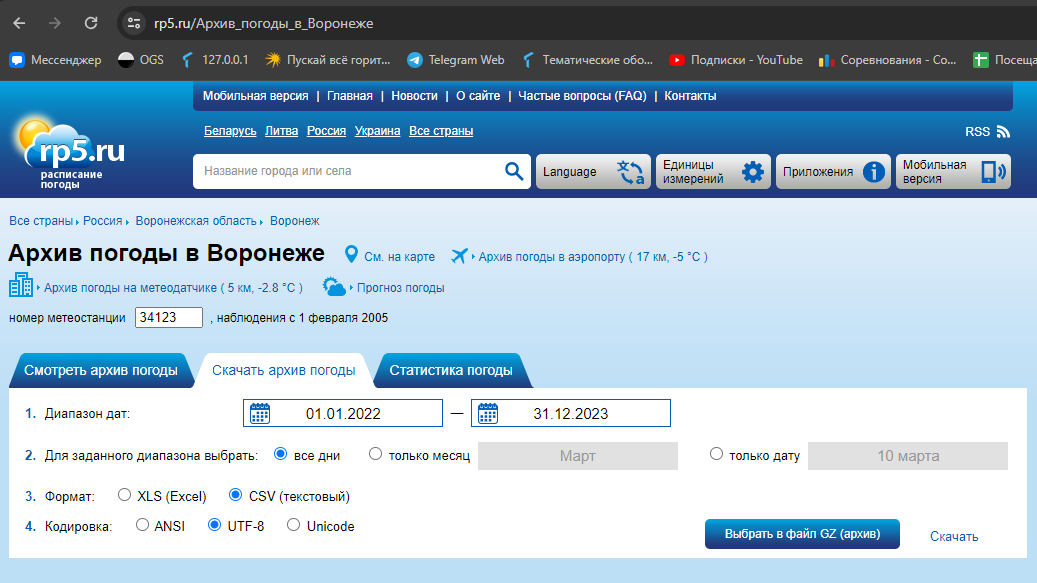

In [17]:
df = pd.read_csv("Data/weather_Voronezh.csv", comment='#', sep=";", parse_dates=["Местное время в Воронеже"], index_col=False, dayfirst=True).sort_values(["Местное время в Воронеже"])
df.head()

,Местное время в Воронеже,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
5834,2022-01-01 00:00:00,-3.2,744.5,758.5,-1.1,93.0,"Ветер, дующий с юга",2.0,NaN,NaN,...,NaN,NaN,10.0,-4.2,NaN,NaN,NaN,NaN,NaN,NaN
5833,2022-01-01 03:00:00,-2.9,743.3,757.3,-1.2,92.0,"Ветер, дующий с юго-юго-запада",2.0,NaN,NaN,...,NaN,NaN,4.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN
5832,2022-01-01 06:00:00,-2.7,741.4,755.4,-1.9,96.0,"Ветер, дующий с юго-юго-востока",4.0,NaN,NaN,...,NaN,NaN,4.0,-3.3,0.3,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,17.0
5831,2022-01-01 09:00:00,-2.7,740.0,754.0,-1.4,97.0,"Ветер, дующий с юга",4.0,NaN,NaN,...,NaN,NaN,2.0,-3.1,NaN,NaN,NaN,NaN,NaN,NaN
5830,2022-01-01 12:00:00,-1.8,738.1,751.9,-1.9,96.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,-2.4,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
meta_data = pd.DataFrame({"Заполнено строк": df.notnull().sum(),
                          "Незаполненно строк": df.isnull().sum(),
                          "Тип данных": df.dtypes})
meta_data["Описание"] = ["Время",
                         "T, температура воздуха (градусы Цельсия) на высоте 2 метра над поверхностью земли",
                         "P0, атмосферное давление на уровне станции (миллиметры ртутного столба)",
                         "P, атмосферное давление, приведенное к среднему уровню моря (миллиметры ртутного столба)",
                         "",
                         "U, относительная влажность (%) на высоте 2 метра над поверхностью земли",
                         "DD, направление ветра (румбы) на высоте 10-12 метров над земной поверхностью, осредненное за 10-минутный период, непосредственно предшествовавший сроку наблюдения",
                         "FF, cкорость ветра на высоте 10-12 метров над земной поверхностью, осредненная за 10-минутный период, непосредственно предшествовавший сроку наблюдения (метры в секунду)",
                         "FF10, максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за 10-минутный период, непосредственно предшествующий сроку наблюдения (метры в секунду)",
                         "FF3, максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за период между сроками (метры в секунду)",
                         "",
                         "",
                         "",
                         "",
                         "Tn, минимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)",
                         "Tx, максимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)",
                         "",
                         "Nh, количество всех наблюдающихся облаков Cl или, при отсутствии облаков Cl, количество всех наблюдающихся облаков Cm",
                         "H, высота основания самых низких облаков (м)",
                         "",
                         "",
                         "VV, горизонтальная дальность видимости (км)",
                         "",
                         "RRR, количество выпавших осадков (миллиметры)",
                         "",
                         "",
                         "",
                         "",
                         "sss, высота снежного покрова (см)"]
meta_data

,Заполнено строк,Незаполненно строк,Тип данных,Описание
Местное время в Воронеже,5835,0,datetime64[ns],Время
T,5832,3,float64,"T, температура воздуха (градусы Цельсия) на вы..."
Po,5833,2,float64,"P0, атмосферное давление на уровне станции (ми..."
P,5834,1,float64,"P, атмосферное давление, приведенное к среднем..."
Pa,5824,11,float64,
U,5831,4,float64,"U, относительная влажность (%) на высоте 2 мет..."
DD,5834,1,object,"DD, направление ветра (румбы) на высоте 10-12 ..."
Ff,5834,1,float64,"FF, cкорость ветра на высоте 10-12 метров над ..."
ff10,285,5550,float64,"FF10, максимальное значение порыва ветра на вы..."
ff3,857,4978,float64,"FF3, максимальное значение порыва ветра на выс..."


In [19]:
my_cols = {"T", "sss", "Местное время в Воронеже", "Po", "U", "RRR", "T"} 
df = df.drop(columns=list(set(df.columns) - my_cols))
df = df.rename(columns={"Местное время в Воронеже": "Date"})
df[:20]


,Date,T,Po,U,RRR,sss
5834,2022-01-01 00:00:00,-3.2,744.5,93.0,NaN,NaN
5833,2022-01-01 03:00:00,-2.9,743.3,92.0,NaN,NaN
5832,2022-01-01 06:00:00,-2.7,741.4,96.0,0.3,17.0
5831,2022-01-01 09:00:00,-2.7,740.0,97.0,NaN,NaN
5830,2022-01-01 12:00:00,-1.8,738.1,96.0,NaN,NaN
5829,2022-01-01 15:00:00,-1.5,736.6,96.0,NaN,NaN
5828,2022-01-01 18:00:00,-0.6,736.4,92.0,8.0,NaN
5827,2022-01-01 21:00:00,-0.2,737.0,93.0,NaN,NaN
5826,2022-01-02 00:00:00,-0.7,737.8,85.0,NaN,NaN
5825,2022-01-02 03:00:00,-1.6,738.9,84.0,NaN,NaN


После удаления столбцов без описания и столбцов, неинтересных мне можно заметить, что наиболее полные измерения производятся в 6:00 и 18:00. Меня интересует динамика в разрезе дня, поэтому оставлю только строки, где время == 6:00. Также мне интереснен только весенний период.

In [20]:
df = df.loc[df["Date"].dt.strftime('%H') == "06"]
df = df.loc[(pd.to_datetime("2022-03-01") <= df["Date"]) & (df["Date"] < pd.to_datetime("2022-06-01"))] 
df = df.reset_index(drop=True)
df[0:40]

,Date,T,Po,U,RRR,sss
0,2022-03-01 06:00:00,0.0,757.8,96.0,0.3,14.0
1,2022-03-02 06:00:00,-0.3,756.3,99.0,Осадков нет,14.0
2,2022-03-03 06:00:00,-0.9,747.7,98.0,1.0,15.0
3,2022-03-04 06:00:00,-0.5,738.0,99.0,22.0,31.0
4,2022-03-05 06:00:00,-3.0,739.4,95.0,Осадков нет,NaN
5,2022-03-06 06:00:00,-3.0,749.0,71.0,Осадков нет,55.0
6,2022-03-07 06:00:00,-7.1,746.0,79.0,Осадков нет,52.0
7,2022-03-08 06:00:00,-4.5,743.8,94.0,Следы осадков,48.0
8,2022-03-09 06:00:00,-5.2,748.1,94.0,0.2,46.0
9,2022-03-10 06:00:00,-11.9,753.4,64.0,Осадков нет,45.0


Заметим, что величина снежного покрова неопределена после 5 апреля, также температура в этот период стабильно держалась выше нуля. Можно сделать вывод, что снег растаял. Данные значения можно заменить нулями.
Также 05.03 нет данных о величине снега. При этом тепература не поднималась выше нуля, и не было осадков. Поэтому можно заполнить значение снежного покрова значением следуюющего дня.

In [21]:
df.loc[4, "sss"] = df["sss"][5]
df["sss"] = df["sss"].fillna(0)
df[20:40]

,Date,T,Po,U,RRR,sss
20,2022-03-21 06:00:00,-0.8,759.8,67.0,Осадков нет,31.0
21,2022-03-22 06:00:00,-2.1,763.2,88.0,Осадков нет,28.0
22,2022-03-23 06:00:00,0.2,758.5,75.0,Осадков нет,27.0
23,2022-03-24 06:00:00,-3.6,751.5,96.0,Осадков нет,25.0
24,2022-03-25 06:00:00,-3.0,751.2,86.0,Осадков нет,16.0
25,2022-03-26 06:00:00,2.3,747.0,72.0,Осадков нет,13.0
26,2022-03-27 06:00:00,0.3,735.3,76.0,3.0,10.0
27,2022-03-28 06:00:00,-6.7,748.6,60.0,Осадков нет,9.0
28,2022-03-29 06:00:00,5.5,737.0,58.0,Осадков нет,9.0
29,2022-03-30 06:00:00,2.7,739.9,81.0,2.0,5.0


In [22]:
df.loc[(df["RRR"] == "Осадков нет") | (df["RRR"] == "Следы осадков"), "RRR"] = 0.0
df["RRR"] = df["RRR"].fillna(0)
df['RRR'] = df['RRR'].astype(np.float64)
df['sss'] = df['sss'].astype(np.float64)

In [23]:
df["sss"].unique()

array([14., 15., 31., 55., 52., 48., 46., 45., 47., 43., 41., 39., 38.,
       37., 36., 35., 28., 27., 25., 16., 13., 10.,  9.,  5.,  3.,  1.,
        0.])

<Figure size 1500x480 with 0 Axes>

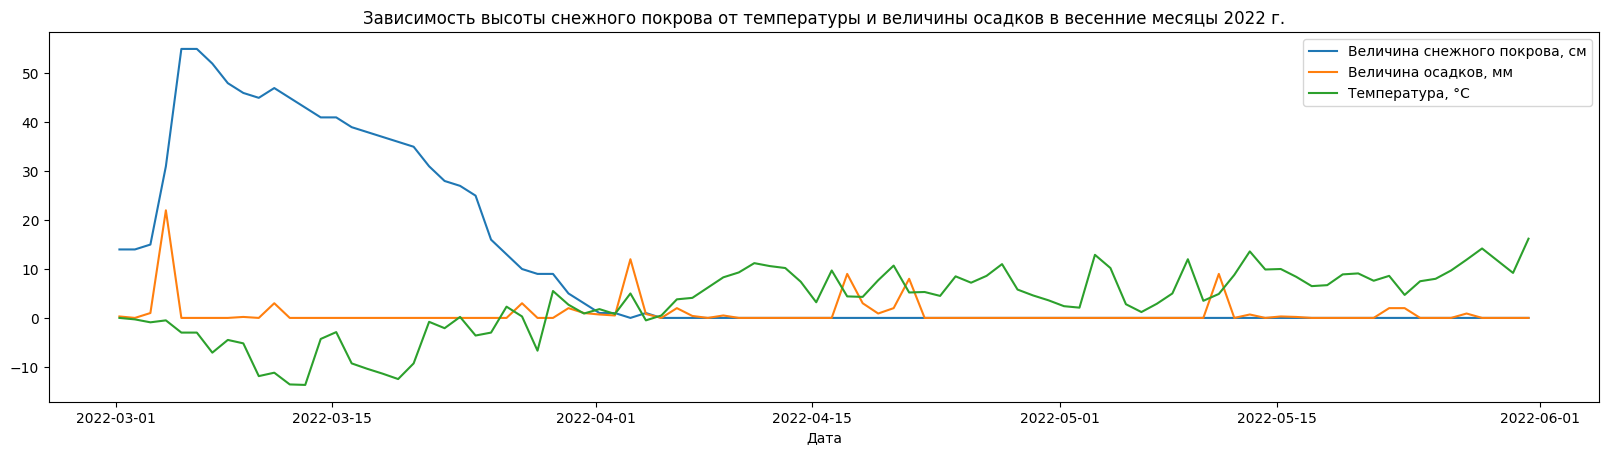

In [24]:
plt.close()
plt.figure().set_figwidth(15)
plt.figure().set_figwidth(20)
plt.plot(df["Date"], df["sss"])
plt.plot(df["Date"], df["RRR"])
plt.plot(df["Date"], df["T"])

plt.legend(["Величина снежного покрова, см",
             "Величина осадков, мм",
             "Температура, °С"], loc='upper right')

plt.title("Зависимость высоты снежного покрова от температуры и величины осадков в весенние месяцы 2022 г.")
plt.xlabel("Дата")
print()

По данному графику видно, что в марте величина снежного покрова увеличивается в зависимости от величины осадков. Скорость уменьшения снежного покрова не зависит от температуры воздуха.

Text(0.5, 0, 'Атмосферное давление')

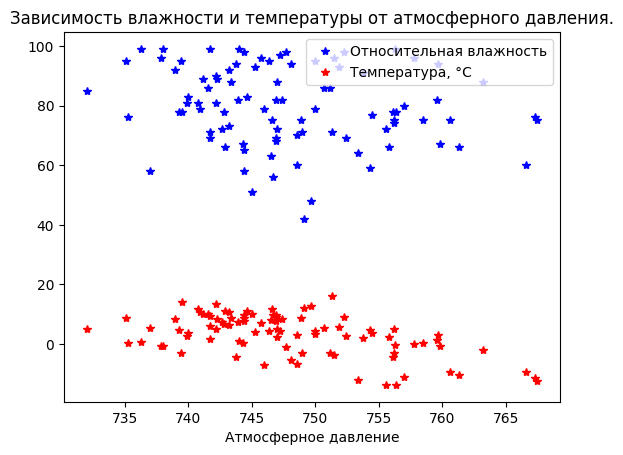

In [25]:
plt.close()
#plt.figure().set_figwidth(15)
#plt.figure().set_figwidth(15)
plt.plot(df["Po"], df["U"], "*b")
plt.plot(df["Po"], df["T"], "*r")

plt.legend(["Относительная влажность",
             "Температура, °С"], loc='upper right')

plt.title("Зависимость влажности и температуры от атмосферного давления.")
plt.xlabel("Атмосферное давление")

По диаграмме распределения видно, что измерения имеют форму двух облаков. Что говорит нам об отсутствии корелляции между изучаемыми величинами. Проверить это можно по диаграмме попарной корреляции.

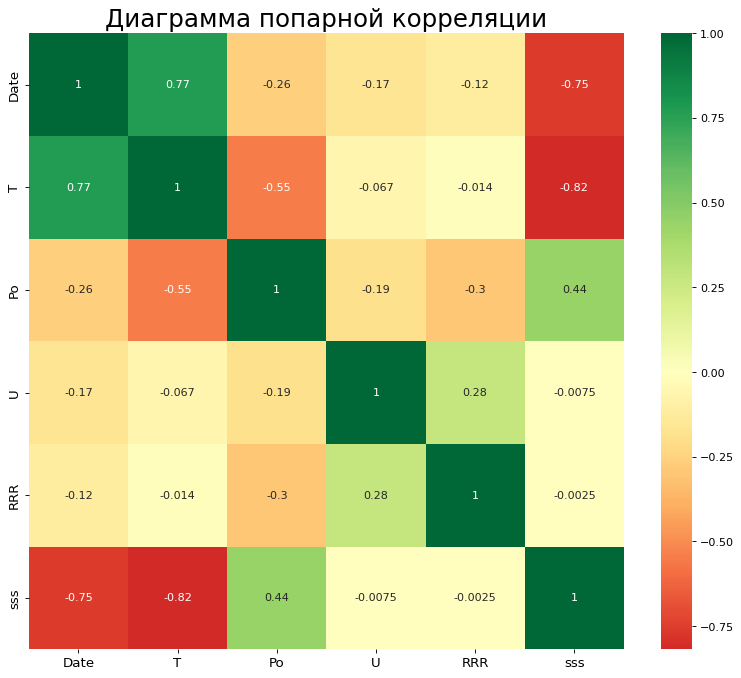

In [26]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Диаграмма попарной корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

На данной диаграмме представлены коэффициэнты корреляции между столбцами выборки. Как можно заметить, величина снежного покрова имеет сильную корреляцию с температурой и датой. Также высокая корреляция между температой и датой. Результат понятен и довольно ожидаем.